## Observations and Insights 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
mouse_study_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [ ]:
# Checking the number of mice.
mouse_count = mouse_study_df["Mouse ID"].count()
mouse_count

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mice = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]
unique_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mouse_study_df.drop_duplicates("Mouse ID")
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

median = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

variance = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

SD = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

SEM = mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


statistics_table_df = pd.DataFrame({"Mean": mean, 
                                    "Median": median, 
                                    "Variance": variance, 
                                    "Standard Deviation": SD,
                                    "SEM": SEM})
statistics_table_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_plot_data = mouse_study_df.groupby(["Drug Regimen"])["Mouse ID"].count()
bar_plot_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

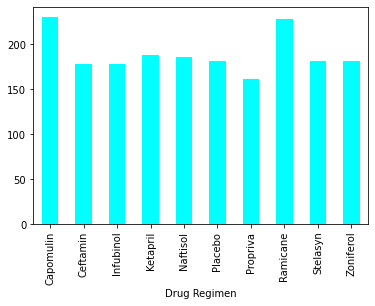

In [36]:
bar_plot_data.plot(kind="bar", color="cyan", legend= False)

In [71]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(bar_plot_data)
y_axis = mouse_study_df.groupby(["Drug Regimen"])
plt.bar(x_axis, y_axis,  color="cyan", align="center")

SyntaxError: invalid syntax (<ipython-input-71-8743dfa2455e>, line 3)

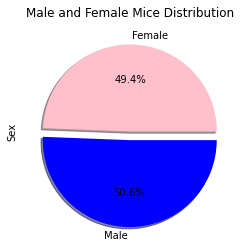

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_data = mouse_study_df.groupby(["Sex"])
pie_plot_data_count = pd.DataFrame(pie_plot_data["Sex"].count())
pie_plot_data_count.head()

pie_plot = pie_plot_data_count.plot.pie(y="Sex", figsize=(4, 4), colors = ["pink", "blue"], 
                                        title = "Male and Female Mice Distribution", legend =False, 
                                        shadow = True, autopct="%1.1f%%", explode = (0, 0.1))

<ipython-input-62-cc392a9b3147>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(pie_plot_data_count.values, labels=pie_plot_data_count.index.values, colors=["pink", "blue"], autopct="%1.1f%%", shadow=True,


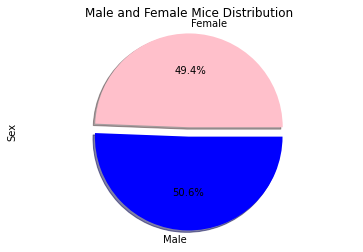

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(pie_plot_data_count.values, labels=pie_plot_data_count.index.values, colors=["pink", "blue"], autopct="%1.1f%%", shadow=True,
       explode = (0, 0.1))
plt.axis("equal")
plt.ylabel("Sex")
plt.title("Male and Female Mice Distribution")
plt.show()

 Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Mouse ID_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,b128,Capomulin,Female,9,22,0,45.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b742,Capomulin,Male,7,21,0,45.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f966,Capomulin,Male,16,17,0,45.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,g288,Capomulin,Male,3,19,0,45.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,g316,Capomulin,Female,22,22,0,45.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18658,w575,Zoniferol,Female,16,28,45,68.401286,3,y769,Ceftamin,Female,6.0,27.0,68.594745,4.0
18659,w575,Zoniferol,Female,16,28,45,68.401286,3,y865,Ceftamin,Male,23.0,26.0,64.729837,3.0
18660,w575,Zoniferol,Female,16,28,45,68.401286,3,z581,Infubinol,Female,24.0,25.0,62.754451,3.0
18661,w575,Zoniferol,Female,16,28,45,68.401286,3,z795,Naftisol,Female,13.0,29.0,65.741070,3.0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
